In [5]:
import plotly.express as px
import pandas as pd
from nltk import word_tokenize
import preprocessor as p
from nltk.corpus import stopwords
import numpy as np
import re
import nltk
import string
import preprocessor as p
from snowballstemmer import TurkishStemmer

,Description,Sentiment_Analysis,Polarity
0,sicak geldi,-1,-0.994384
1,patates puresi guzel degil,-1,-0.999425
2,eren abi iyidir,1,0.923093
3,kuryeci telefonda 2 dakikaya geliyorum dedi 15...,-1,-0.987747
4,birazdaha hizli olabilir,-1,-0.869727
...,...,...,...
45649,patates tam bir facia,-1,-0.997230
45650,yavas geldi soguktu adresi yazmama ragmen bula...,1,0.644097
45651,resimde görüldügü servis gelmedi soguktu patat...,-1,-0.999386
45652,gayet lezzetliydi uzun suredir siparis vermemi...,1,0.814470


-1    31606
 1    12542
 0     1506
Name: Sentiment_Analysis, dtype: int64


<AxesSubplot:title={'center':'Sentiment Analysis'}>

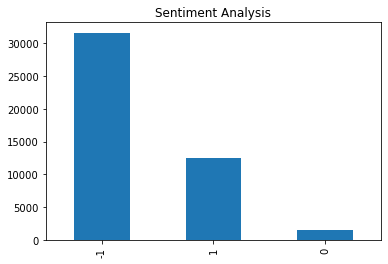

In [4]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import pandas as pd
import string
from nltk.corpus import stopwords

df = pd.read_csv(r'C:\Users\Azizg\Desktop\kfc.csv') 
df['Description'] = df['Description'].astype('str') 

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

PUNCT_TO_REMOVE = string.punctuation
stoplist=stopwords.words('turkish')

def remove_punctuation(text):# notktalama işaretleri
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['Description'] = df['Description'].apply(lambda text: remove_punctuation(text))

def lower_letter(text):
    return text.lower()

df['Description'] = df['Description'].apply(lambda text: lower_letter(text))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stoplist])

df['Description'] = df['Description'].apply(lambda text: remove_stopwords(text))

def get_polarity(text): 
    p=sa(text)
    if(p[0]['label'] == "positive"):
        return p[0]['score']
    else:
        return -(p[0]['score'])


def get_polarity2(text):
    p=sa(text)
    if(p[0]['label'] == "positive"):
        if(p[0]['score']<0.60):
            return 0
        else:
            return 1
    elif(p[0]['label'] == "negative"):
        if(p[0]['score']<0.60):
            return 0
        else:
            return -1
    
    
df['Sentiment_Analysis'] = df['Description'].apply(get_polarity2)
    
df['Polarity'] = df['Description'].apply(get_polarity)

df.to_csv(r'C:\Users\Azizg\Desktop\KFC_Yorumlar.csv', index = False)
df2 = pd.read_csv(r'C:\Users\Azizg\Desktop\KFC_Yorumlar.csv') 
display(df2)
print(df.Sentiment_Analysis.value_counts())
df.Sentiment_Analysis.value_counts().plot(kind='bar',title="Sentiment Analysis")

,Description,Sentiment_Analysis,Polarity
0,iyiydi çook,1,0.976436
1,keske istanbulun yerinde restoranlardan kadar ...,1,0.931109
2,lezzetli hizli gönderim tesekkürler dominos,1,0.953385
3,2 adet litrelik kola 0 bardak santiyeye söyled...,1,0.789364
4,cok iyiydi,1,0.990868
...,...,...,...
63508,harika,1,0.986047
63509,güzeldi,1,0.968275
63510,iyi,1,0.870731
63511,hizli tesekkür ederim,1,0.843299


-1    36147
 1    24907
 0     2459
Name: Sentiment_Analysis, dtype: int64


<AxesSubplot:title={'center':'Sentiment Analysis'}>

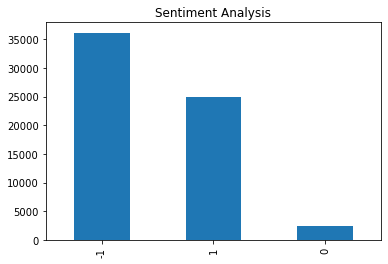

In [6]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import pandas as pd
import string
from nltk.corpus import stopwords

df = pd.read_csv(r'C:\Users\Azizg\Desktop\dominos.csv') 
df['Description'] = df['Description'].astype('str') 

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

PUNCT_TO_REMOVE = string.punctuation
stoplist=stopwords.words('turkish')

def remove_punctuation(text):# notktalama işaretleri
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['Description'] = df['Description'].apply(lambda text: remove_punctuation(text))

def lower_letter(text):
    return text.lower()

df['Description'] = df['Description'].apply(lambda text: lower_letter(text))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stoplist])

df['Description'] = df['Description'].apply(lambda text: remove_stopwords(text))

def get_polarity(text): 
    p=sa(text)
    if(p[0]['label'] == "positive"):
        return p[0]['score']
    else:
        return -(p[0]['score'])


def get_polarity2(text):
    p=sa(text)
    if(p[0]['label'] == "positive"):
        if(p[0]['score']<0.60):
            return 0
        else:
            return 1
    elif(p[0]['label'] == "negative"):
        if(p[0]['score']<0.60):
            return 0
        else:
            return -1
    
df['Sentiment_Analysis'] = df['Description'].apply(get_polarity2)
    
df['Polarity'] = df['Description'].apply(get_polarity)

df.to_csv(r'C:\Users\Azizg\Desktop\Dominos_Yorumlar.csv', index = False)
df2 = pd.read_csv(r'C:\Users\Azizg\Desktop\Dominos_Yorumlar.csv') 
display(df2)
print(df.Sentiment_Analysis.value_counts())
df.Sentiment_Analysis.value_counts().plot(kind='bar',title="Sentiment Analysis")



,Description,Sentiment_Analysis,Polarity
0,tesekkür ederim getiren kurye kibar asildi ell...,-1,-0.853113
1,güzeldi,1,0.968275
2,turan abiye hizi ilgisi kibarligi tesekkür ede...,1,0.924195
3,sicakcik hizli,-1,-0.897025
4,kurye iyiydi tesekkür ederiz,1,0.830041
...,...,...,...
151704,verdigimiz sipariste 1 litrelik kola unutuldu ...,-1,-0.999259
151705,patatesler buz burusuk resmen bekletilmis pate...,-1,-0.998933
151706,patates kizartmasi soguk kuruydu,-1,-0.998349
151707,kurye erkan bey e hiz nezaketi icin tesekkürler,-1,-0.653662


-1    108190
 1     38433
 0      5086
Name: Sentiment_Analysis, dtype: int64


<AxesSubplot:title={'center':'Sentiment Analysis'}>

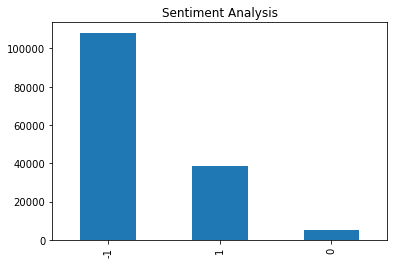

In [7]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import pandas as pd
import string
from nltk.corpus import stopwords

df = pd.read_csv(r'C:\Users\Azizg\Desktop\burgerking.csv') 
df['Description'] = df['Description'].astype('str') 

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

PUNCT_TO_REMOVE = string.punctuation
stoplist=stopwords.words('turkish')

def remove_punctuation(text):# notktalama işaretleri
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['Description'] = df['Description'].apply(lambda text: remove_punctuation(text))

def lower_letter(text):
    return text.lower()

df['Description'] = df['Description'].apply(lambda text: lower_letter(text))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stoplist])

df['Description'] = df['Description'].apply(lambda text: remove_stopwords(text))

def get_polarity(text): 
    p=sa(text)
    if(p[0]['label'] == "positive"):
        return p[0]['score']
    else:
        return -(p[0]['score'])


def get_polarity2(text):
    p=sa(text)
    if(p[0]['label'] == "positive"):
        if(p[0]['score']<0.60):
            return 0
        else:
            return 1
    elif(p[0]['label'] == "negative"):
        if(p[0]['score']<0.60):
            return 0
        else:
            return -1
    
df['Sentiment_Analysis'] = df['Description'].apply(get_polarity2)
    
df['Polarity'] = df['Description'].apply(get_polarity)

df.to_csv(r'C:\Users\Azizg\Desktop\BurgerKing_Yorumlar.csv', index = False)
df2 = pd.read_csv(r'C:\Users\Azizg\Desktop\BurgerKing_Yorumlar.csv') 
display(df2)
print(df.Sentiment_Analysis.value_counts())
df.Sentiment_Analysis.value_counts().plot(kind='bar',title="Sentiment Analysis")

,Description,Sentiment_Analysis,Polarity
0,3 kisiye fazlaymis,-1,-0.986880
1,böylesi lezzet üzerindeki kitir kaplama doyuru...,1,0.980468
2,ellerinize saglik mayonezler yanlisti saglik o...,1,0.958331
3,çitir çitirdi tesekkür ederim,1,0.973921
4,cok güzel sicak geldi lezzet süper,1,0.986710
...,...,...,...
47423,inanlimaz guzel lezzetli,1,0.966723
47424,1 saat 40 dkda geldi sebebi kuryenin kazaya ka...,-1,-0.992990
47425,sey tesekkürler ellerinize saglik,1,0.967463
47426,90 dk gelen siparis,1,0.919703


-1    33781
 1    12233
 0     1414
Name: Sentiment_Analysis, dtype: int64


<AxesSubplot:title={'center':'Sentiment Analysis'}>

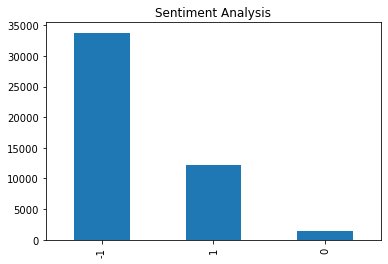

In [8]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
import pandas as pd
import string
from nltk.corpus import stopwords

df = pd.read_csv(r'C:\Users\Azizg\Desktop\popeyes.csv') 
df['Description'] = df['Description'].astype('str') 

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

PUNCT_TO_REMOVE = string.punctuation
stoplist=stopwords.words('turkish')

def remove_punctuation(text):# notktalama işaretleri
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['Description'] = df['Description'].apply(lambda text: remove_punctuation(text))

def lower_letter(text):
    return text.lower()

df['Description'] = df['Description'].apply(lambda text: lower_letter(text))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stoplist])

df['Description'] = df['Description'].apply(lambda text: remove_stopwords(text))

def get_polarity(text): 
    p=sa(text)
    if(p[0]['label'] == "positive"):
        return p[0]['score']
    else:
        return -(p[0]['score'])


def get_polarity2(text):
    p=sa(text)
    if(p[0]['label'] == "positive"):
        if(p[0]['score']<0.60):
            return 0
        else:
            return 1
    elif(p[0]['label'] == "negative"):
        if(p[0]['score']<0.60):
            return 0
        else:
            return -1
    
df['Sentiment_Analysis'] = df['Description'].apply(get_polarity2)
    
df['Polarity'] = df['Description'].apply(get_polarity)

df.to_csv(r'C:\Users\Azizg\Desktop\Popeyes_Yorumlar.csv', index = False)
df2 = pd.read_csv(r'C:\Users\Azizg\Desktop\Popeyes_Yorumlar.csv') 
display(df2)
print(df.Sentiment_Analysis.value_counts())
df.Sentiment_Analysis.value_counts().plot(kind='bar',title="Sentiment Analysis")

In [44]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

p=sa("Tam 19dk da ulasti ve sicakti her sey, tesekkurler")
print(p)

[{'label': 'positive', 'score': 0.9706384539604187}]


,Description,Sentiment_Analysis,Polarity
0,iyiydi çook,1,0.976436
1,keske istanbulun yerinde restoranlardan kadar ...,1,0.931109
2,lezzetli hizli gönderim tesekkürler dominos,1,0.953385
3,2 adet litrelik kola 0 bardak santiyeye söyled...,1,0.789364
4,cok iyiydi,1,0.990868
...,...,...,...
94,kötü tavsiye etmiyorum,-1,-0.996007
95,yanik soguk geç geldi,-1,-0.772528
96,buz geç geldi,-1,-0.994260
97,güzeldi,1,0.968275


-1    52
 1    47
Name: Sentiment_Analysis, dtype: int64


<AxesSubplot:title={'center':'Sentiment Analysis'}>

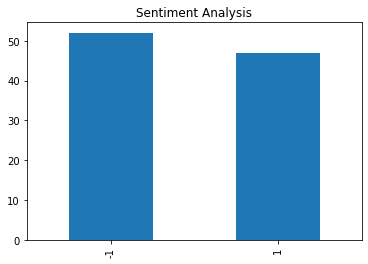

In [26]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from IPython.display import display
import pandas as pd
import string
from nltk.corpus import stopwords

df = pd.read_csv(r'C:\Users\Azizg\Desktop\a.csv') 
df['Description'] = df['Description'].astype('str') 

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

PUNCT_TO_REMOVE = string.punctuation
stoplist=stopwords.words('turkish')

def remove_punctuation(text):# notktalama işaretleri
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['Description'] = df['Description'].apply(lambda text: remove_punctuation(text))

def lower_letter(text):
    return text.lower()

df['Description'] = df['Description'].apply(lambda text: lower_letter(text))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stoplist])

df['Description'] = df['Description'].apply(lambda text: remove_stopwords(text))

def get_polarity(text): 
    p=sa(text)
    if(p[0]['label'] == "positive"):
        return p[0]['score']
    else:
        return -(p[0]['score'])


def get_polarity2(text):
    p=sa(text)
    if(p[0]['label'] == "positive"):
        return 1
    elif(p[0]['label'] == "negative"):
        return -1
    if(p[0]['score']<0.60):
        return 0
    
df['Sentiment_Analysis'] = df['Description'].apply(get_polarity2)
    
df['Polarity'] = df['Description'].apply(get_polarity)

df.to_csv(r'C:\Users\Azizg\Desktop\a2.csv', index = False)
df2 = pd.read_csv(r'C:\Users\Azizg\Desktop\a2.csv') 
display(df2)
print(df.Sentiment_Analysis.value_counts())
df.Sentiment_Analysis.value_counts().plot(kind='bar',title="Sentiment Analysis")


INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


,Description,Sentiment_Analysis,Polarity
0,iyiydi çook,1,0.976436
1,keske istanbulun yerinde restoranlardan kadar ...,1,0.931109
2,lezzetli hizli gönderim tesekkürler dominos,1,0.953385
3,2 adet litrelik kola 0 bardak santiyeye söyled...,1,0.789364
4,cok iyiydi,1,0.990868
...,...,...,...
94,kötü tavsiye etmiyorum,-1,-0.996007
95,yanik soguk geç geldi,-1,-0.772528
96,buz geç geldi,-1,-0.994260
97,güzeldi,1,0.968275


-1    52
 1    47
Name: Sentiment_Analysis, dtype: int64


<AxesSubplot:title={'center':'Sentiment Analysis'}>

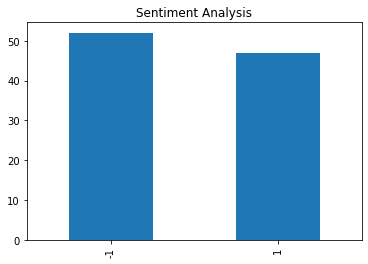

In [1]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from IPython.display import display
import pandas as pd
import string
from nltk.corpus import stopwords

df = pd.read_csv(r'C:\Users\Azizg\Desktop\a.csv') 
df['Description'] = df['Description'].astype('str') 

model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
sa= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

PUNCT_TO_REMOVE = string.punctuation
stoplist=stopwords.words('turkish')

def remove_punctuation(text):# notktalama işaretleri
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

df['Description'] = df['Description'].apply(lambda text: remove_punctuation(text))

def lower_letter(text):
    return text.lower()

df['Description'] = df['Description'].apply(lambda text: lower_letter(text))

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stoplist])

df['Description'] = df['Description'].apply(lambda text: remove_stopwords(text))

def get_polarity(text): 
    p=sa(text)
    if(p[0]['label'] == "positive"):
        return p[0]['score']
    else:
        return -(p[0]['score'])


def get_polarity2(text):
    p=sa(text)
    if(p[0]['label'] == "positive"):
        return 1
    elif(p[0]['label'] == "negative"):
        return -1
    if(p[0]['score']<0.60):
        return 0
    
df['Sentiment_Analysis'] = df['Description'].apply(get_polarity2)
    
df['Polarity'] = df['Description'].apply(get_polarity)

df.to_csv(r'C:\Users\Azizg\Desktop\a2.csv', index = False)
df2 = pd.read_csv(r'C:\Users\Azizg\Desktop\a2.csv') 
display(df2)
print(df.Sentiment_Analysis.value_counts())
df.Sentiment_Analysis.value_counts().plot(kind='bar',title="Sentiment Analysis")
